In [1]:
import os
import pickle
import sys

sys.path.append(sys.path[0] + "/..")  # Adds higher directory to python modules path.

import numpy as np
import scipy
from Functions import renormalize, scomplex, plotting, support
import matplotlib.pyplot as plt
from scipy.stats import entropy as sp_entropy
import networkx as nx

In [2]:

pref = f"ER"
path = f"../Tests/Experiments_random/{pref}"

with open(path + "/deg_dist.pkl", "rb") as f:
    deg_dist_random = pickle.load(f)

dim = support.list_dim(deg_dist_random)
n_tau = dim[2]
rep = dim[0]


Ns_random = np.zeros((rep, n_tau), dtype=int)

for r in range(rep):
    for t in range(n_tau):
        Ns_random[r, t] = len(deg_dist_random[r][0][t][0])

deg_mean = np.zeros((rep, n_tau))
deg_energy = np.zeros((rep, n_tau))

for r in range(rep):
    for tau in range(n_tau):
        deg2r = deg_dist_random[r][0][tau][0]
        deg_mean[r, tau] = np.mean(deg2r)
        deg_energy[r, tau] = np.mean(deg2r**2)

Nrand = Ns_random[0,0]


In [7]:
def Nfunc(t):
    return (Nrand - t)
def A(kt,kte, Nt):
    return (1 - (kte - kt)/(Nt*(Nt-1)) - 2/Nt)
def B(kt, kte, Nt):
    return (kte - kt)/(Nt*(Nt-1))
def C(Nt):
    return 2/(Nt)

k0 = np.median(deg_mean[:,0],0)
k0e = np.median(deg_energy[:,0],0)

p = 0.6
kt = np.zeros(int(np.floor(p*Nrand)))
kte = np.zeros(int(np.floor(p*Nrand)))

kt[0] = k0
kte[0] = k0e
for t in range(1,int(np.floor(p*Nrand))):
     kt[t] = kt[t-1]*Nfunc(t)/(Nfunc(t)-1)*(1-2/(Nfunc(t)*(Nfunc(t)-1)))

#for t in range(1,int(np.floor(p*Nrand))):
    #kt[t] = (A(kt[t-1],kte[t-1],Nfunc(t-1)) + B(kt[t-1],kte[t-1],Nfunc(t-1)) + 2*C(Nfunc(t-1)))*kt[t-1] - B(kt[t-1],kte[t-1],Nfunc(t-1)) - 2*C(Nfunc(t-1))/(Nfunc(t-1) - 1)*kte[t-1]
    #kte[t] = (A(kt[t-1],kte[t-1],Nfunc(t-1)) + B(kt[t-1],kte[t-1],Nfunc(t-1)))*kte[t-1] + B(kt[t-1],kte[t-1],Nfunc(t-1))*(-2*kt[t-1] +1) + 2*C(Nfunc(t-1))*Nfunc(t-1)/(Nfunc(t-1)-1)*(kte[t-1] - kt[t-1]**2 - 2*kt[t-1]/Nfunc(t-1) + kt[t-1]/Nfunc(t-1))

#for t in range(1,int(np.floor(p*Nrand))):
    #kt[t] = A(kt[t-1],kte[t-1],Nfunc(t-1))*kt[t-1] +  B(kt[t-1],kte[t-1],Nfunc(t-1))*(kt[t-1]-1) + C(Nfunc(t-1))*kt[t-1]*2*(kt[t-1]-1) + C(Nfunc(t-1))*(Nfunc(t-1)-kt[t-1])*2*kt[t-1]
    #kte[t] = A(kt[t-1],kte[t-1],Nfunc(t-1))*kte[t-1] + B(kt[t-1],kte[t-1],Nfunc(t-1))*(kte[t-1]-2*kt[t-1] + 1) + C(Nfunc(t-1))*kt[t-1]*(2*kte[t-1]+2*kt[t-1]**2-4*kt[t-1]+1) + C(Nfunc(t-1))*(Nfunc(t-1)-kt[t-1])*2*(kte[t-1] + kt[t-1]**2)
   

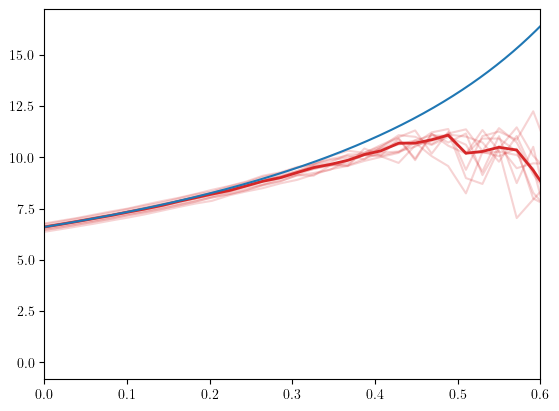

In [10]:
for r in range(rep):
    plt.plot(1-Ns_random[r,:]/Nrand, deg_mean[r,:], color="tab:red", alpha = 0.2)
plt.plot(1-np.median(Ns_random/Nrand,0), np.median(deg_mean,0), color = "tab:red", lw = 2, label = "random")
plt.xlim(xmin = 0,xmax = p)
#plt.ylim(1,4)
xx = np.linspace(0,p,int(np.floor(p*Nrand)))
plt.plot(xx,kt)
#plt.plot(xx,1/(1-xx-1/Nrand)*k0)

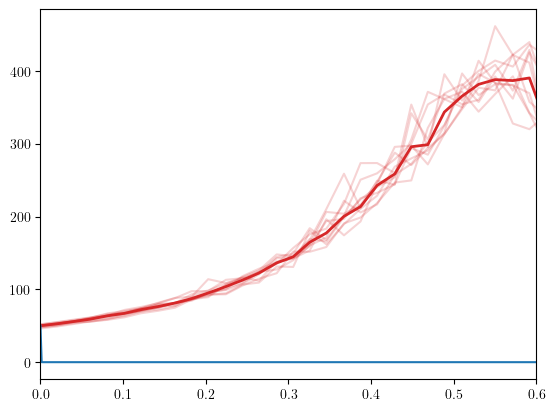

In [11]:
for r in range(rep):
    plt.plot(1-Ns_random[r,:]/Nrand, deg_energy[r,:], color="tab:red", alpha = 0.2)
plt.plot(1-np.median(Ns_random/Nrand,0), np.median(deg_energy,0), color = "tab:red", lw = 2, label = "random")
plt.xlim(xmin = 0,xmax = p)
#plt.ylim(1,4)
xx = np.linspace(0,p,int(np.floor(p*Nrand)))
plt.plot(xx,kte)
#plt.plot(xx,1/(1-xx-1/Nrand)*k0)